### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [31]:
# Loading the dataset
data = pd.read_csv("language_detection.csv")

In [32]:
data.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [33]:
# value count for each language
data["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [34]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [35]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

### Text preprocessing

In [37]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

### Bag of Words

In [9]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [10]:
X.shape

(10337, 39404)

### Train Test split

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [39]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test = cv.transform(X_test).toarray()



### Model creation and Prediction

In [40]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [41]:
# prediction
y_pred = model.predict(x_test)

### Evaluating the model

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [43]:
print("Accuracy is :",ac)

Accuracy is : 0.9758220502901354


In [16]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       1.00      0.95      0.97        95
           2       0.99      0.98      0.99       118
           3       0.92      1.00      0.96       280
           4       0.99      0.98      0.99       200
           5       1.00      0.99      1.00       107
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        11
           8       1.00      0.97      0.98       120
           9       1.00      1.00      1.00        55
          10       1.00      0.98      0.99       118
          11       1.00      0.99      0.99       162
          12       1.00      0.97      0.99       138
          13       0.96      0.99      0.98       166
          14       0.99      0.99      0.99       139
          15       1.00      1.00      1.00        89
          16       1.00      0.95      0.97        95

    accuracy              

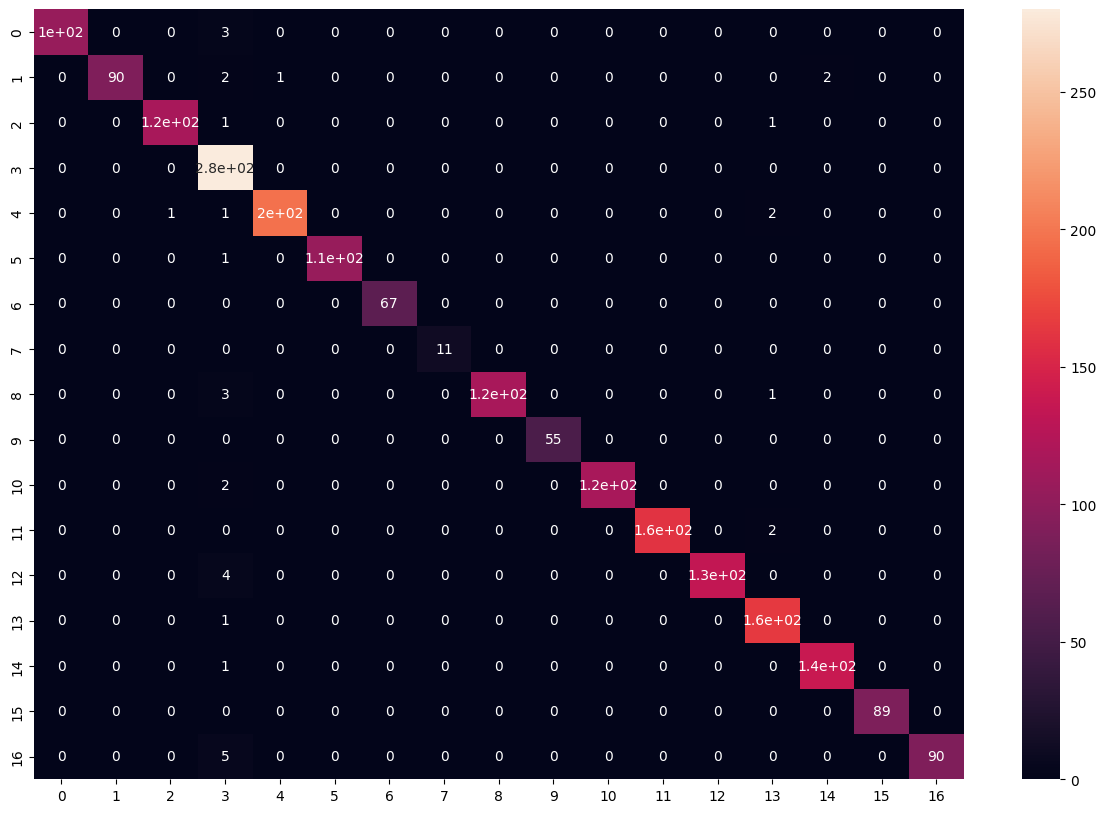

In [17]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [45]:
#combine all steps in one step
from sklearn.pipeline import Pipeline
pipe= Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [46]:
y_pred2 = pipe.predict(X_test)
ac2= accuracy_score(y_test, y_pred2)
print(ac2)

0.9758220502901354


In [47]:
with open('trained_pipeline-0.1.0.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [53]:
text = "ciao "
y = pipe.predict([text])
le.classes_[y[0]], y

('Italian', array([8]))

### Model Saving

In [25]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))